<a href="https://colab.research.google.com/github/Mbigdeli2003/Game-Theory/blob/main/GTHW5_Q2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discerete Replicator Dynamics

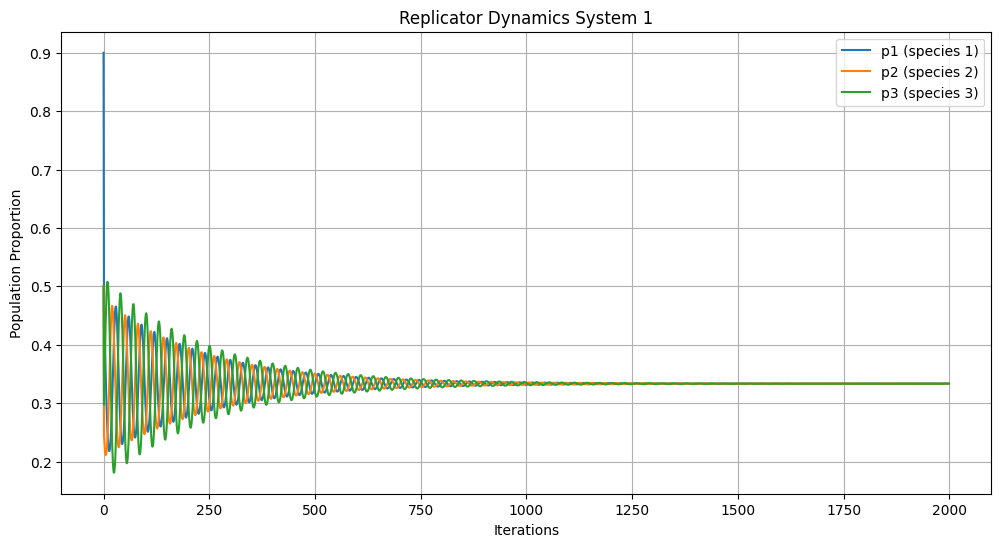

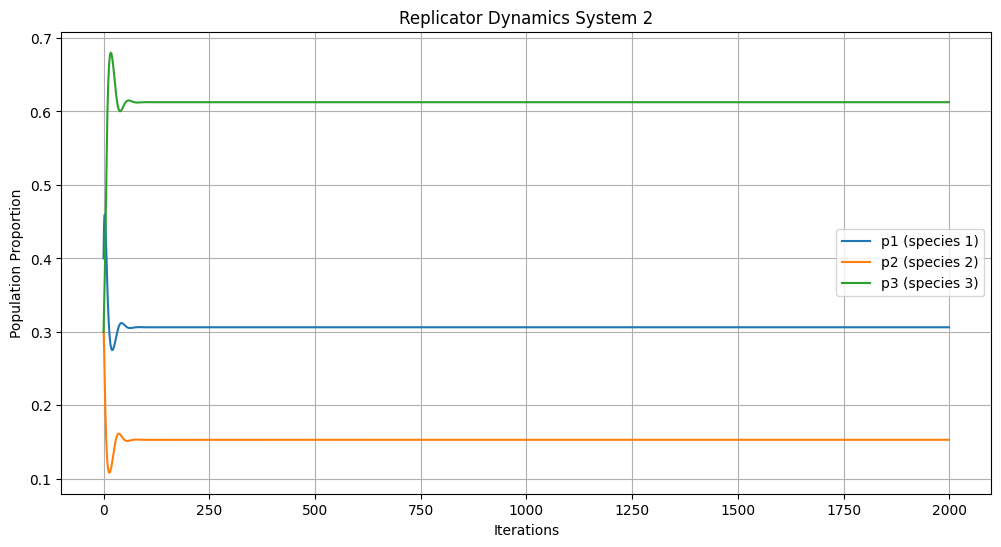

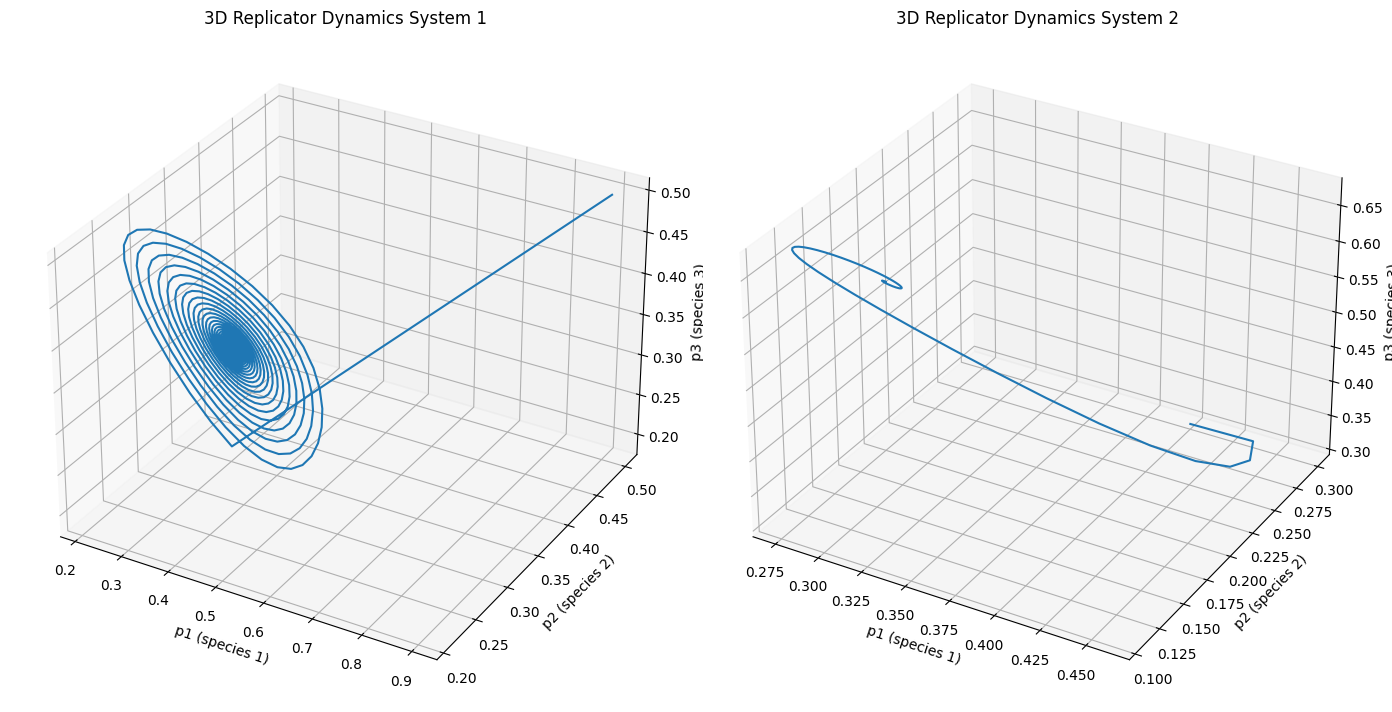

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the first set of replicator dynamics equations
def replicator_dynamics_1(p):
    p1, p2, p3 = p
    denominator = p1 * (6*p1 + 5*p2 + 11*p3) + p2 * (8*p1 + 6*p2 + 2*p3) + p3 * (5*p1 + 8*p2 + 6*p3)
    dp1 = p1 * (6*p1 + 8*p2 + 5*p3) / denominator
    dp2 = p2 * (5*p1 + 6*p2 + 8*p3) / denominator
    dp3 = p3 * (11*p1 + 2*p2 + 6*p3) / denominator
    return [dp1, dp2, dp3]

# Define the second set of replicator dynamics equations
def replicator_dynamics_2(p):
    p1, p2, p3 = p
    denominator = p1 * (4*p1 + 3*p2 + 9*p3) + p2 * (6*p1 + 4*p2) + p3 * (3*p1 + 6*p2 + 4*p3)
    dp1 = p1 * (4*p1 + 6*p2 + 5*p3) / denominator
    dp2 = p2 * (3*p1 + 4*p2 + 6*p3) / denominator
    dp3 = p3 * (9*p1 + 4*p3) / denominator
    return [dp1, dp2, dp3]

# Initial conditions
initial_conditions_1 = [0.90, 0.50, 0.50]
initial_conditions_2 = [0.40, 0.30, 0.30]

# Number of iterations
iterations = 2000

# Arrays to store the population proportions over time
populations_1 = np.zeros((iterations, 3))
populations_2 = np.zeros((iterations, 3))

# Set initial conditions
populations_1[0] = initial_conditions_1
populations_2[0] = initial_conditions_2

# Iterate through the replicator dynamics equations
for i in range(1, iterations):
    populations_1[i] = replicator_dynamics_1(populations_1[i-1])
    populations_2[i] = replicator_dynamics_2(populations_2[i-1])

# Time array for plotting
time = np.arange(iterations)

# Plotting the results for the first system in 2D
plt.figure(figsize=(12, 6))
plt.plot(time, populations_1[:, 0], label='p1 (species 1)')
plt.plot(time, populations_1[:, 1], label='p2 (species 2)')
plt.plot(time, populations_1[:, 2], label='p3 (species 3)')
plt.xlabel('Iterations')
plt.ylabel('Population Proportion')
plt.title('Replicator Dynamics System 1')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for the second system in 2D
plt.figure(figsize=(12, 6))
plt.plot(time, populations_2[:, 0], label='p1 (species 1)')
plt.plot(time, populations_2[:, 1], label='p2 (species 2)')
plt.plot(time, populations_2[:, 2], label='p3 (species 3)')
plt.xlabel('Iterations')
plt.ylabel('Population Proportion')
plt.title('Replicator Dynamics System 2')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for both systems
fig = plt.figure(figsize=(14, 7))

# 3D plot for the first system
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(populations_1[:, 0], populations_1[:, 1], populations_1[:, 2])
ax1.set_xlabel('p1 (species 1)')
ax1.set_ylabel('p2 (species 2)')
ax1.set_zlabel('p3 (species 3)')
ax1.set_title('3D Replicator Dynamics System 1')

# 3D plot for the second system
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(populations_2[:, 0], populations_2[:, 1], populations_2[:, 2])
ax2.set_xlabel('p1 (species 1)')
ax2.set_ylabel('p2 (species 2)')
ax2.set_zlabel('p3 (species 3)')
ax2.set_title('3D Replicator Dynamics System 2')

plt.tight_layout()
plt.show()


## Discerete time codes with consdiering differntial equations for solving

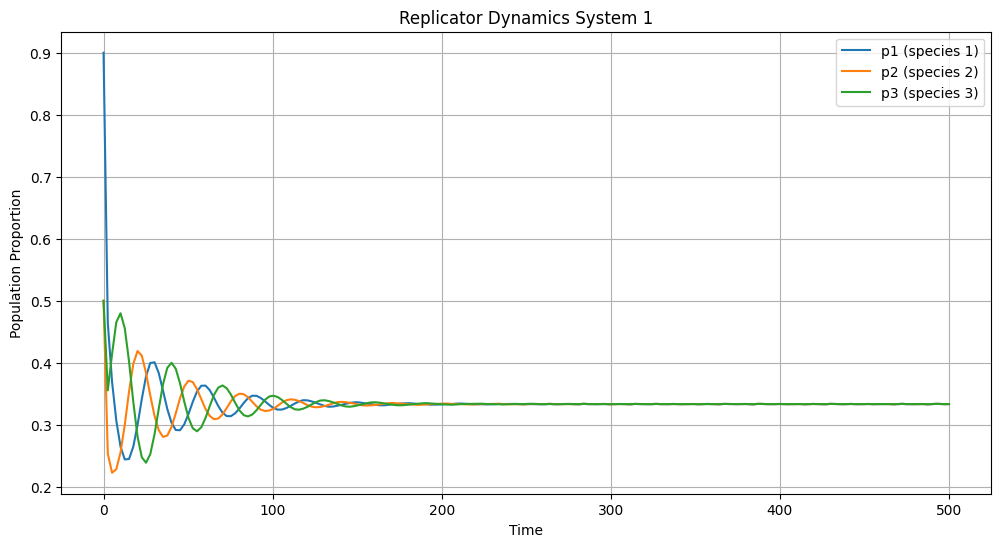

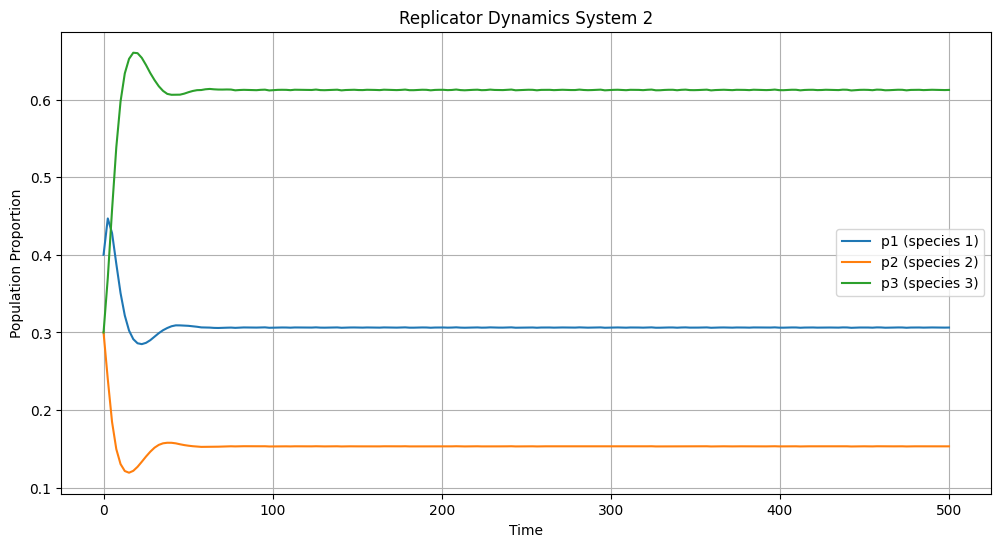

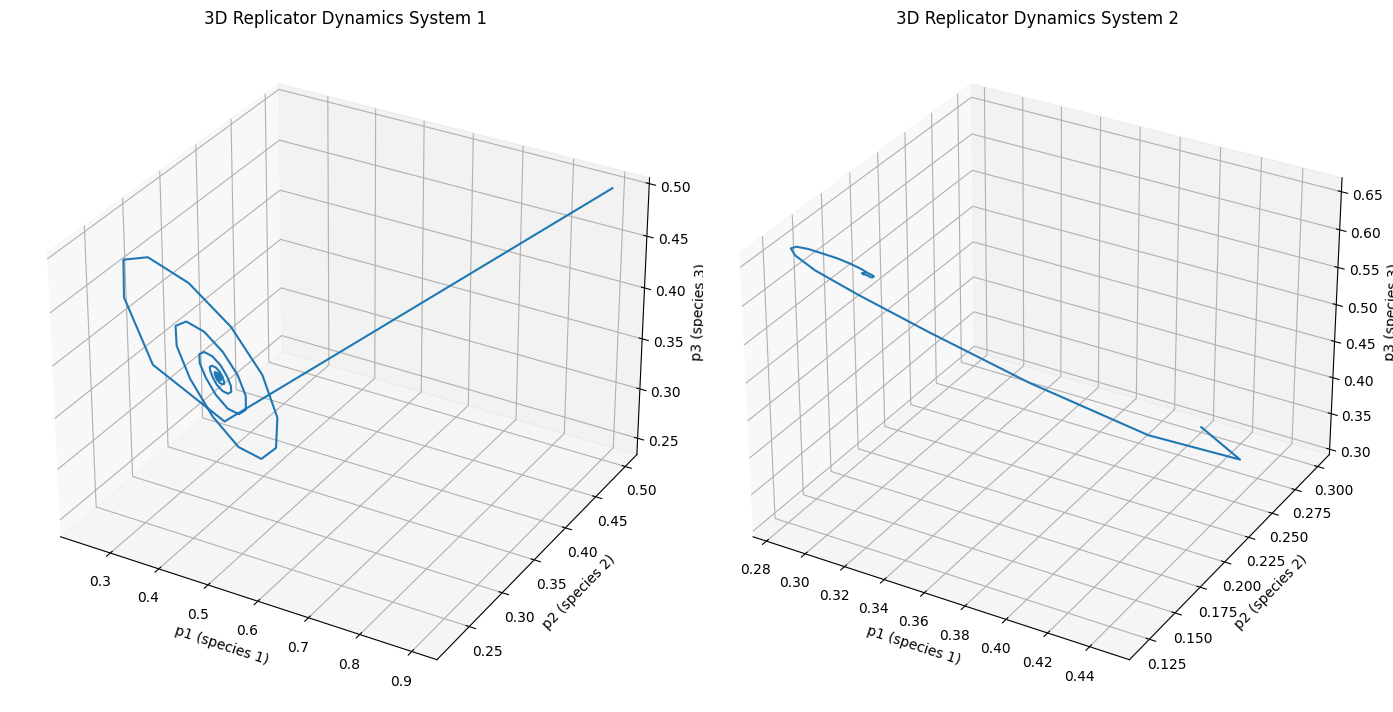

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the first set of replicator dynamics equations
def replicator_dynamics_1(t, p):
    p1, p2, p3 = p
    denominator = p1 * (6*p1 + 5*p2 + 11*p3) + p2 * (8*p1 + 6*p2 + 2*p3) + p3 * (5*p1 + 8*p2 + 6*p3)
    dp1_dt = p1 * (6*p1 + 8*p2 + 5*p3) / denominator - p1
    dp2_dt = p2 * (5*p1 + 6*p2 + 8*p3) / denominator - p2
    dp3_dt = p3 * (11*p1 + 2*p2 + 6*p3) / denominator - p3
    return [dp1_dt, dp2_dt, dp3_dt]

# Define the second set of replicator dynamics equations
def replicator_dynamics_2(t, p):
    p1, p2, p3 = p
    denominator = p1 * (4*p1 + 3*p2 + 9*p3) + p2 * (6*p1 + 4*p2) + p3 * (3*p1 + 6*p2 + 4*p3)
    dp1_dt = p1 * (4*p1 + 6*p2 + 5*p3) / denominator - p1
    dp2_dt = p2 * (3*p1 + 4*p2 + 6*p3) / denominator - p2
    dp3_dt = p3 * (9*p1 + 4*p3) / denominator - p3
    return [dp1_dt, dp2_dt, dp3_dt]

# Initial conditions for the first system
initial_conditions_1 = [0.90, 0.50, 0.50]

# Initial conditions for the second system
initial_conditions_2 = [0.40, 0.30, 0.30]

# Time span for the simulation
t_span = (0, 500)
t_eval = np.linspace(t_span[0], t_span[1], 200)

# Solve the first system of differential equations
solution_1 = solve_ivp(replicator_dynamics_1, t_span, initial_conditions_1, t_eval=t_eval)

# Solve the second system of differential equations
solution_2 = solve_ivp(replicator_dynamics_2, t_span, initial_conditions_2, t_eval=t_eval)

# Plotting the results for the first system in 2D
plt.figure(figsize=(12, 6))
plt.plot(solution_1.t, solution_1.y[0], label='p1 (species 1)')
plt.plot(solution_1.t, solution_1.y[1], label='p2 (species 2)')
plt.plot(solution_1.t, solution_1.y[2], label='p3 (species 3)')
plt.xlabel('Time')
plt.ylabel('Population Proportion')
plt.title('Replicator Dynamics System 1')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for the second system in 2D
plt.figure(figsize=(12, 6))
plt.plot(solution_2.t, solution_2.y[0], label='p1 (species 1)')
plt.plot(solution_2.t, solution_2.y[1], label='p2 (species 2)')
plt.plot(solution_2.t, solution_2.y[2], label='p3 (species 3)')
plt.xlabel('Time')
plt.ylabel('Population Proportion')
plt.title('Replicator Dynamics System 2')
plt.legend()
plt.grid(True)
plt.show()

# 3D Plot for both systems
fig = plt.figure(figsize=(14, 7))

# 3D plot for the first system
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(solution_1.y[0], solution_1.y[1], solution_1.y[2])
ax1.set_xlabel('p1 (species 1)')
ax1.set_ylabel('p2 (species 2)')
ax1.set_zlabel('p3 (species 3)')
ax1.set_title('3D Replicator Dynamics System 1')

# 3D plot for the second system
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(solution_2.y[0], solution_2.y[1], solution_2.y[2])
ax2.set_xlabel('p1 (species 1)')
ax2.set_ylabel('p2 (species 2)')
ax2.set_zlabel('p3 (species 3)')
ax2.set_title('3D Replicator Dynamics System 2')

plt.tight_layout()
plt.show()


# Contnious Replicator Dynamics

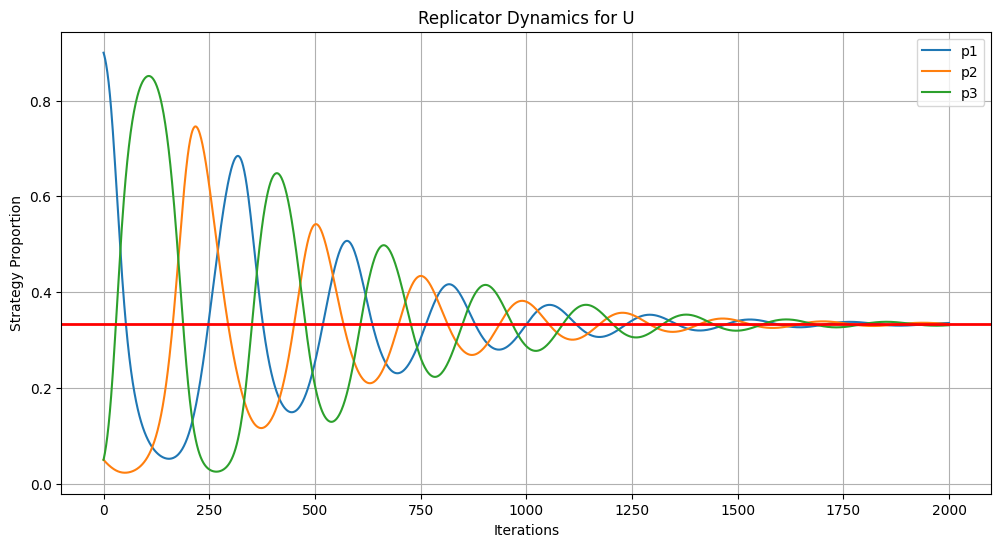

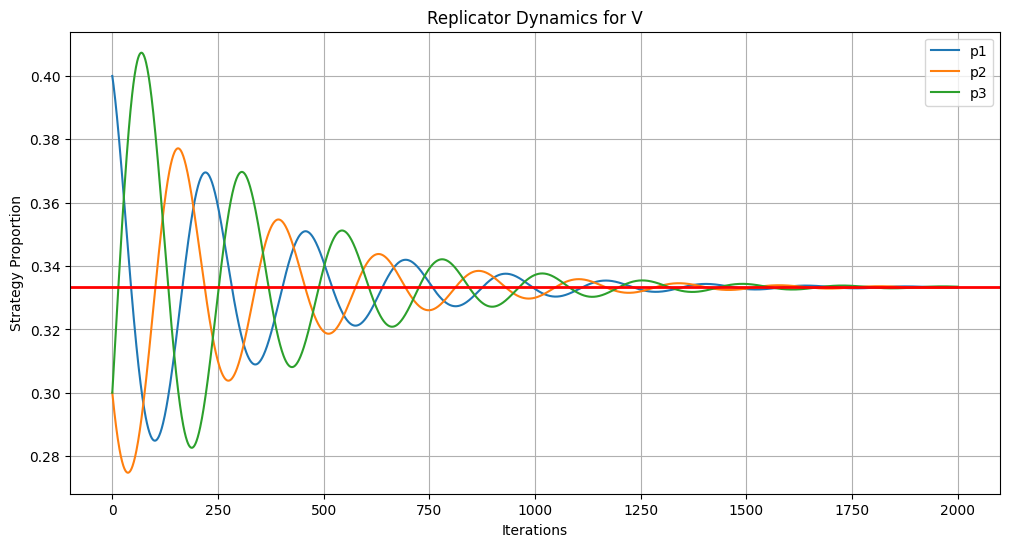

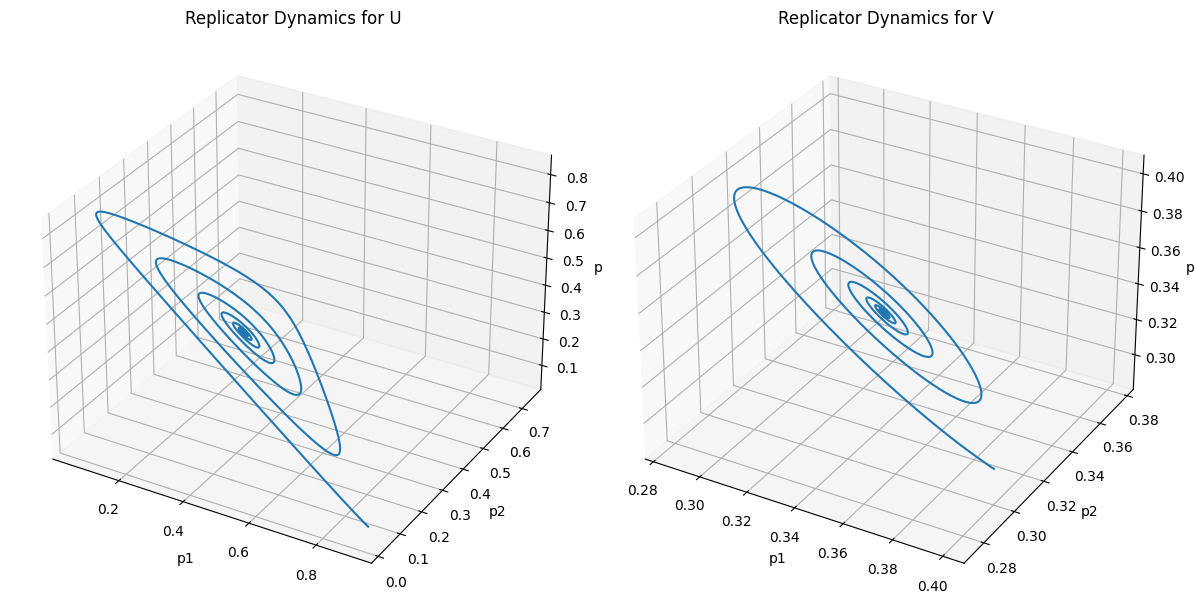

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def replicator_dynamics(A, x0, iterations):
    x = np.array(x0)
    history = [x.copy()]

    for _ in range(iterations):
        x_dot = x * (A @ x - x.T @ A @ x)
        x = x + x_dot * 0.02  # small time step for continuous approximation
        history.append(x.copy())

    return np.array(history)

U = np.array([[6, 8, 5], [5, 6, 8], [11, 2, 6]])
V = np.array([[4, 6, 3], [3, 4, 6], [9, 0, 4]])

x0_U = [0.90, 0.050, 0.050]
x0_V = [0.40, 0.30, 0.30]

iterations = 2000
history_U = replicator_dynamics(U, x0_U, iterations)
history_V = replicator_dynamics(V, x0_V, iterations)

plt.figure(figsize=(12, 6))
plt.plot(history_U[:, 0], label='p1')
plt.plot(history_U[:, 1], label='p2')
plt.plot(history_U[:, 2], label='p3')
plt.axhline(y=1/3,linewidth=2, color='r')
plt.title('Replicator Dynamics for U')
plt.xlabel('Iterations')
plt.ylabel('Strategy Proportion')
plt.legend()
plt.grid()
plt.figure(figsize=(12, 6))
plt.plot(history_V[:, 0], label='p1')
plt.plot(history_V[:, 1], label='p2')
plt.plot(history_V[:, 2], label='p3')
plt.axhline(y=1/3,linewidth=2, color='r')
plt.title('Replicator Dynamics for V')
plt.xlabel('Iterations')
plt.ylabel('Strategy Proportion')
plt.legend()
plt.grid()
history_U = replicator_dynamics(U, x0_U, iterations)
history_V = replicator_dynamics(V, x0_V, iterations)
fig = plt.figure(figsize=(12, 6))

# Plotting for U
ax = fig.add_subplot(121, projection='3d')
ax.plot(history_U[:, 0], history_U[:, 1], history_U[:, 2])
ax.plot(1/3, 1/3, 1/3,linewidth=2, color='r')
ax.set_title('Replicator Dynamics for U')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')

# Plotting for V
ax = fig.add_subplot(122, projection='3d')
ax.plot(history_V[:, 0], history_V[:, 1], history_V[:, 2])
ax.plot(1/3, 1/3, 1/3,linewidth=2, color='r')
ax.set_title('Replicator Dynamics for V')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('p3')

plt.tight_layout()
plt.show()

# plt.tight_layout()
plt.show()